# TASK #1: UNDERSTAND THE PROBLEM AND BUSINESS CASE

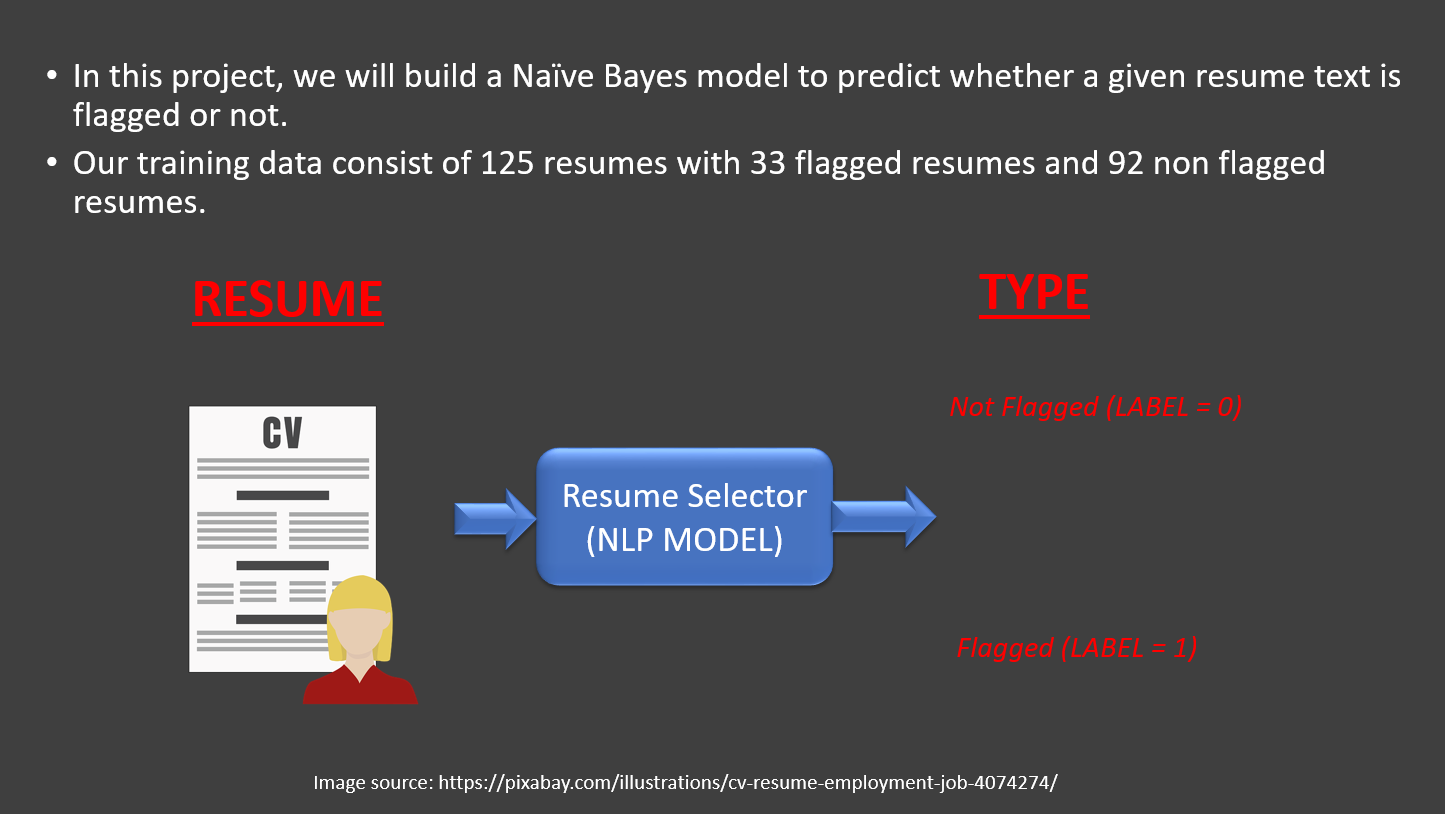

In [ ]:
# Data Source: https://www.kaggle.com/samdeeplearning/deepnlp

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [11]:
# install nltk
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [12]:
# install gensim
!pip install gensim


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [13]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [18]:
# load the data
resume_df = pd.read_csv('resume.csv', encoding = 'latin-1')

resume_df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [19]:
# data containing resume
resume_df = resume_df[['resume_text', 'class']]

resume_df


,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


MINI CHALLENGE #1: 
- Print the first and last elements in the dataframe. 

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [20]:
# obtain dataframe information
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [21]:
# check for null values
resume_df.isnull()


,resume_text,class
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
120,False,False
121,False,False
122,False,False
123,False,False


In [22]:
resume_df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [23]:
resume_df['class'] = resume_df['class'].apply(lambda x: 1 if x == 'flagged' else 0)

resume_df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


MINI CHALLENGE #2:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

# TASK #4: PERFORM DATA CLEANING

In [24]:
resume_df['resume_text'] = resume_df['resume_text'].apply(lambda x: x.replace('\r', ''))

resume_df                                     
                                     

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [25]:
# download nltk packages
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# download nltk packages
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Get additional stopwords from nltk
from nltk.corpus import stopwords

stop_words= stopwords.words('english')

stop_words.extend(['fron', 'subject', 're', 'edu', 'use', 'email', 'com'])


In [28]:
# Remove stop words and remove words with 2 or less characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return ' '.join(result)

In [29]:
# Cleaned text
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

In [30]:
resume_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [31]:
print(resume_df['cleaned'][0])

customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research proj

In [32]:
print(resume_df['resume_text'][0])

Customer Service Supervisor/Tier - Isabella Catalog CompanySouth Burlington VT - Email me on Indeed: indeed.com/r//49f8c9aecf490d26WORK EXPERIENCECustomer Service Supervisor/TierIsabella Catalog Company - Shelburne VT - August 2015 to Present2 Customer Service/Visual Set Up & Display/Website Maintenance¢ Supervise customer service team of a popular catalog company¢ Manage day to day issues and resolution of customer upset to ensure customer satisfaction¢ Troubleshoot order and shipping issues: lost in transit order errors damages¢ Manage and resolve escalated customer calls to ensure customer satisfaction¢ Assist customers with order placing cross-selling/upselling of catalog merchandise¢ Set up and display of sample merchandise in catalog library as well as customer pick-up area of the facility ¢ Website clean-up: adding images type up product information proofreadingAdministrative Assistant /Events Coordinator/Office Services AssistantEileen Fisher Inc - Irvington NY - 

# TASK #5: VISUALIZE CLEANED DATASET

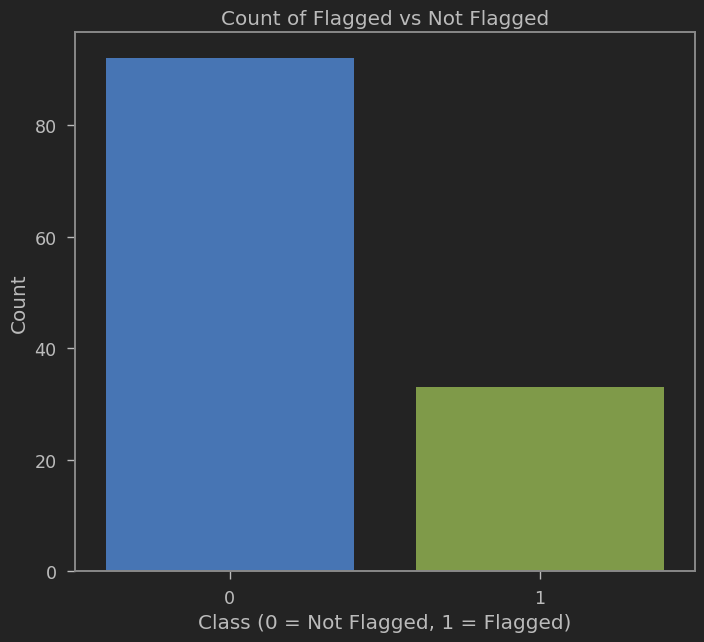

In [33]:
# Plot the counts of flagged vs not flagged

#import seaborn as sns
#import matplotlib.pyplot as plt

sns.countplot(x='class', data=resume_df)
plt.title('Count of Flagged vs Not Flagged')
plt.xlabel('Class (0 = Not Flagged, 1 = Flagged)')
plt.ylabel('Count')
plt.show()


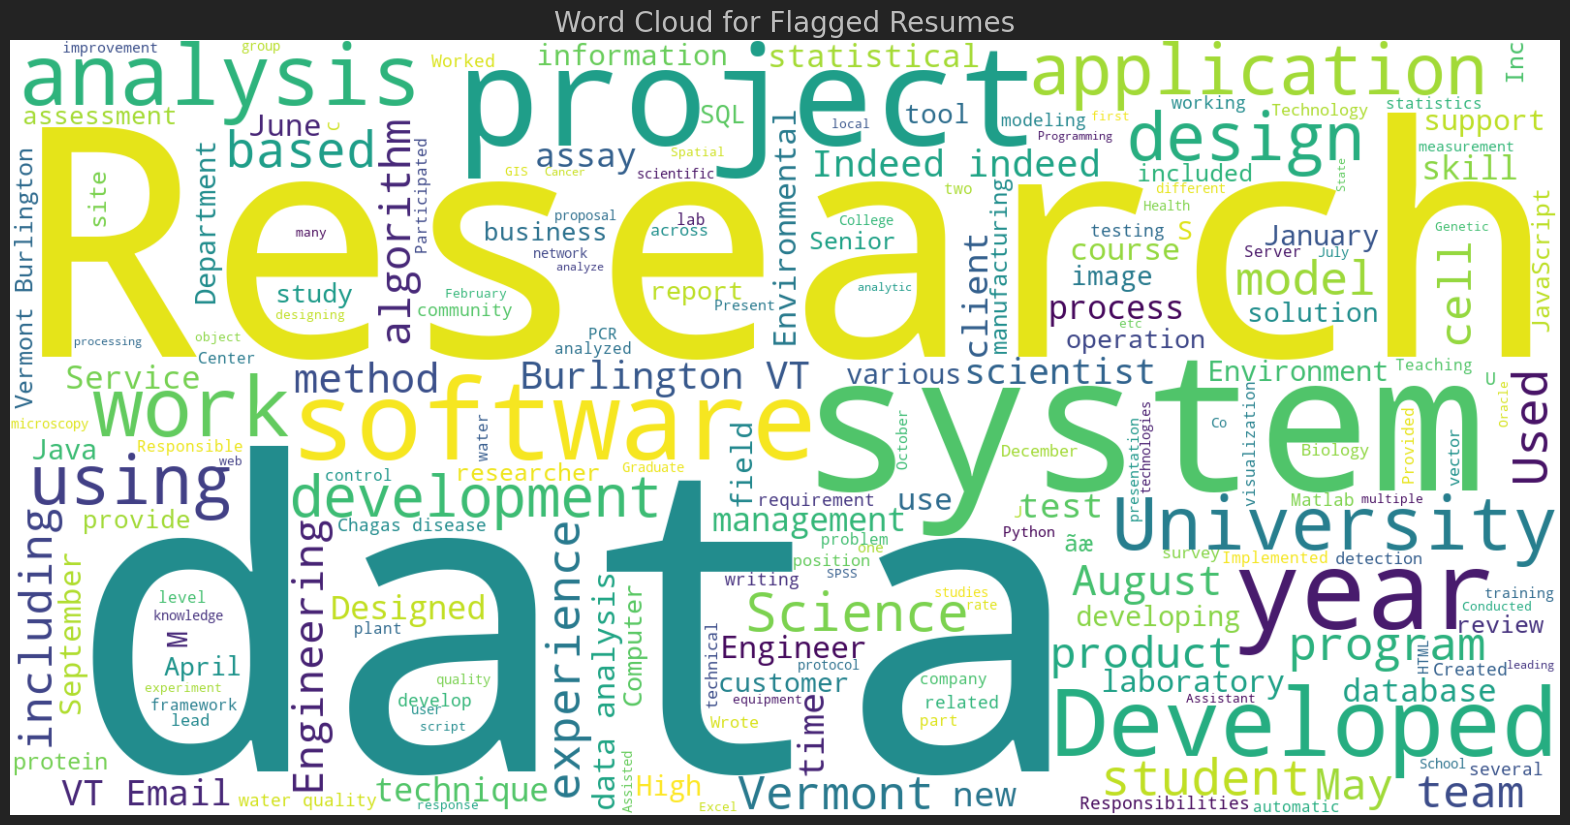

In [34]:
# plot the word cloud for text that is flagged
#plt.figure(figsize = (20,20)) 
from wordcloud import WordCloud
#import matplotlib.pyplot as plt

# Filter flagged resumes
flagged_text = " ".join(resume_df[resume_df['class'] == 1]['resume_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(flagged_text)

# Plot
plt.figure(figsize=(20, 20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Flagged Resumes', fontsize=20)
plt.show()




MINI CHALLENGE #3:
- Plot the wordcloud for class #1 

# TASK #6: PREPARE THE DATA BY APPLYING COUNT VECTORIZER

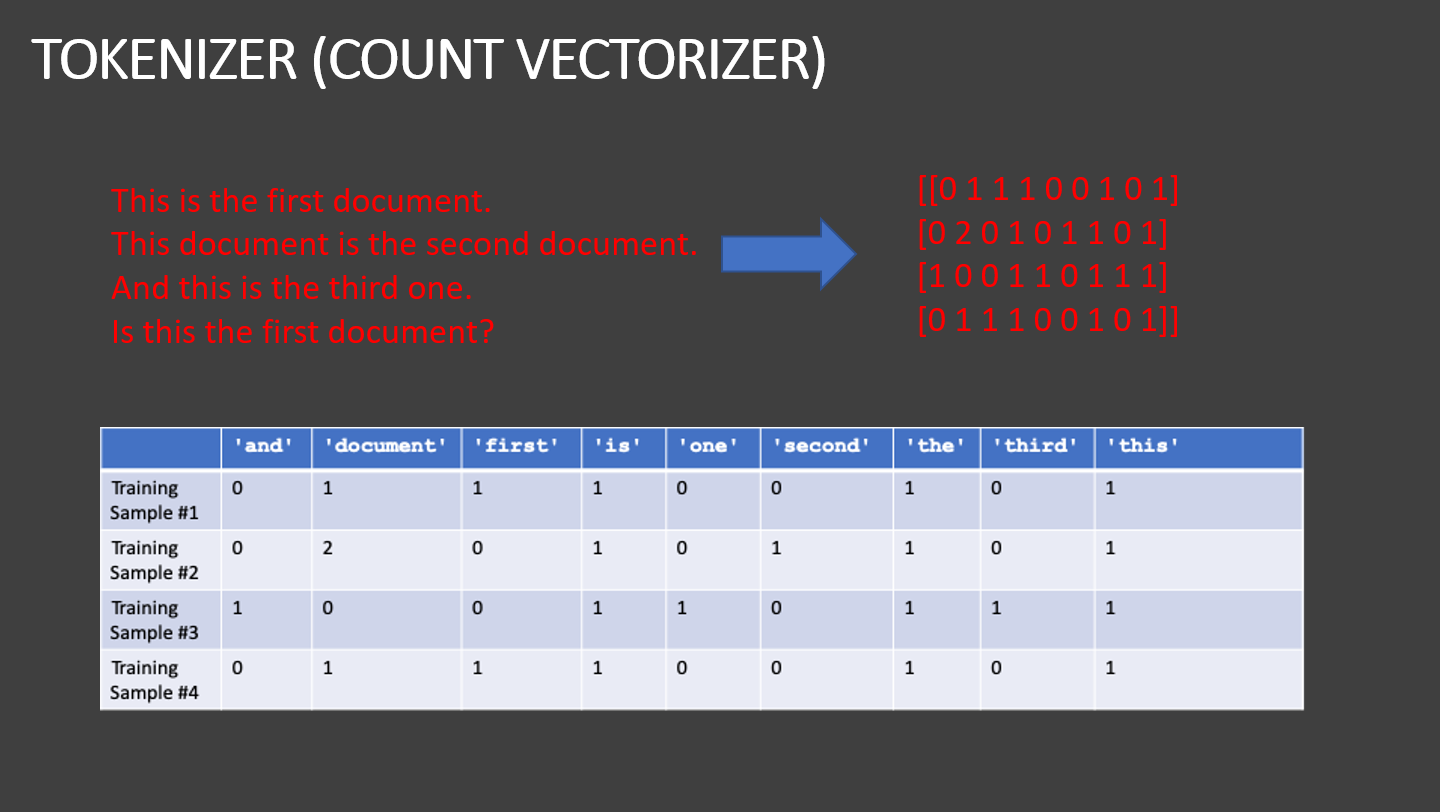

In [48]:
# CountVectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(sample_data)



In [52]:


# Sample data
sample_data = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(sample_data)



In [53]:
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [39]:
import sklearn
print(sklearn.__version__)


1.5.1


In [40]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

# Applying CountVectorizer to the cleaned text
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(resume_df['cleaned'])


In [56]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TASK #7: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #1

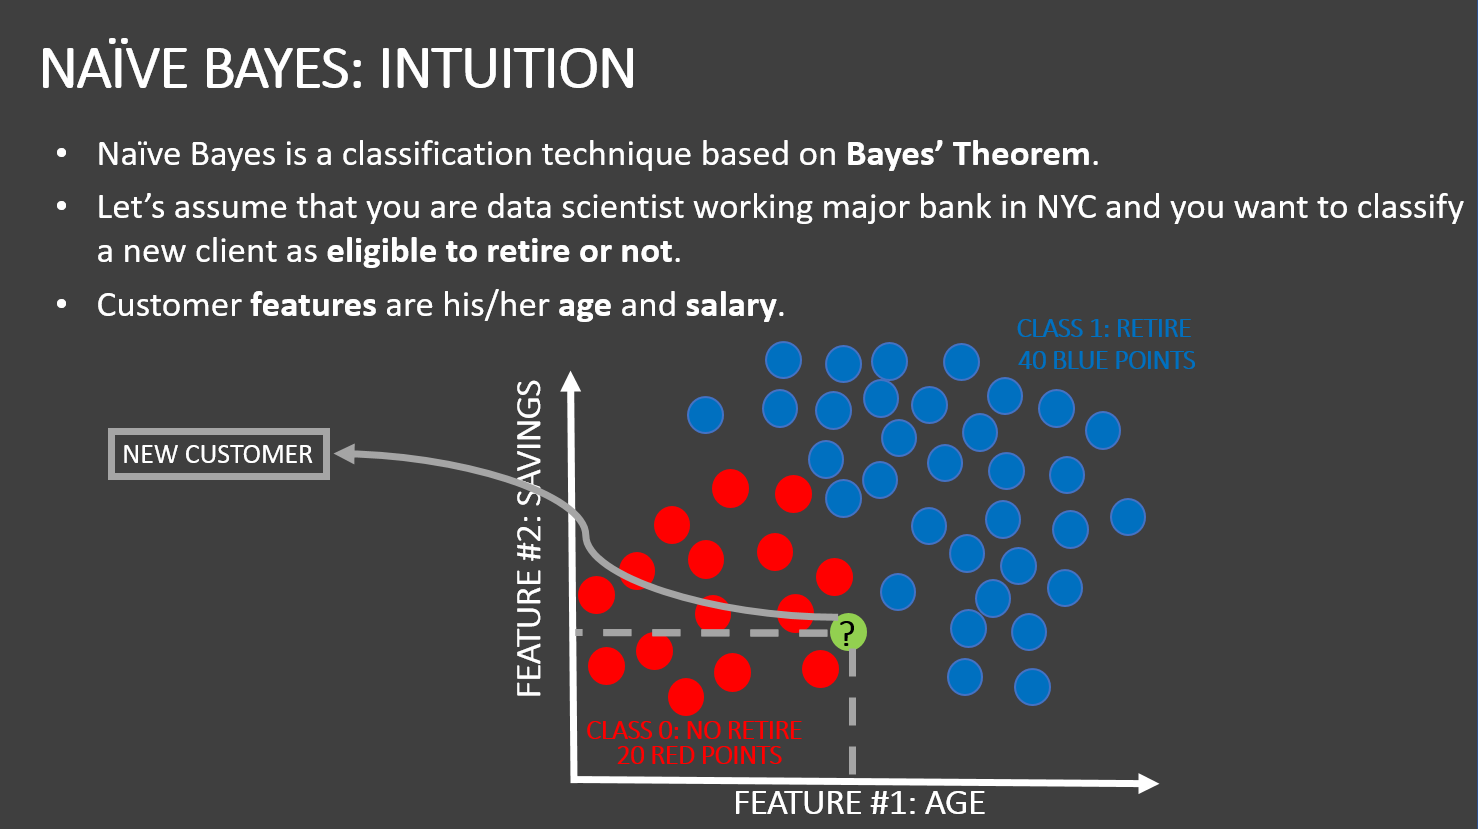

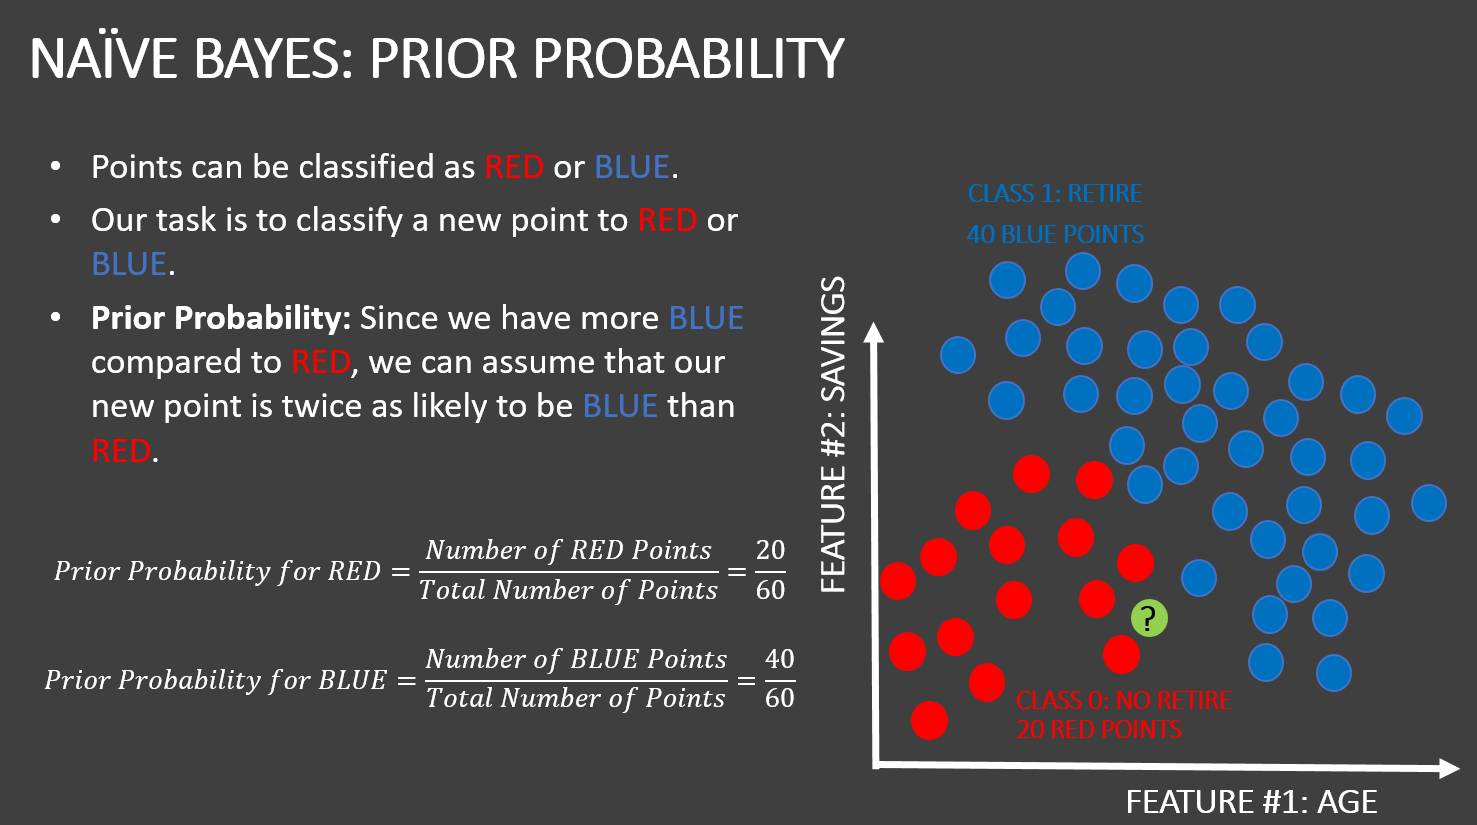

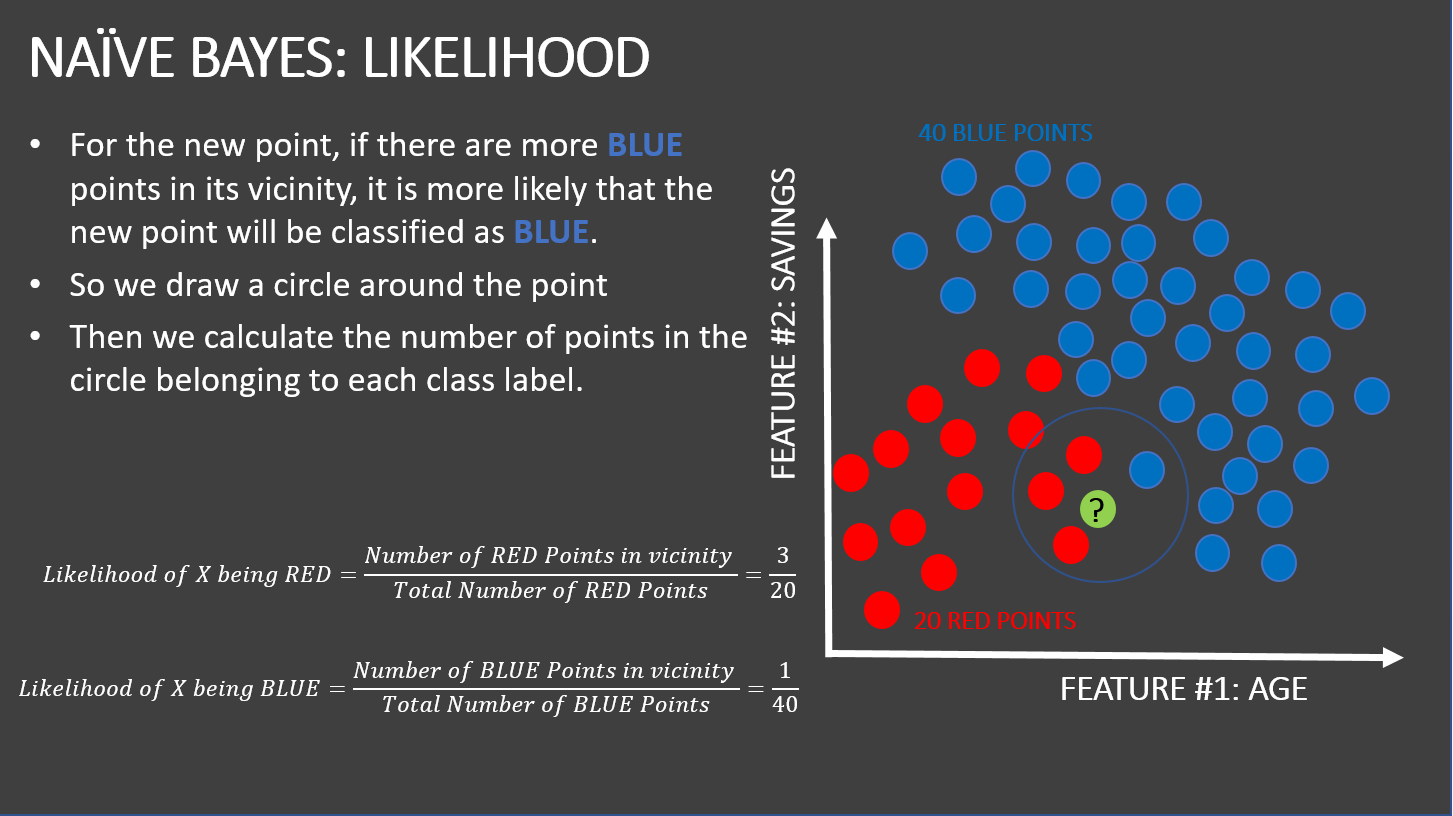

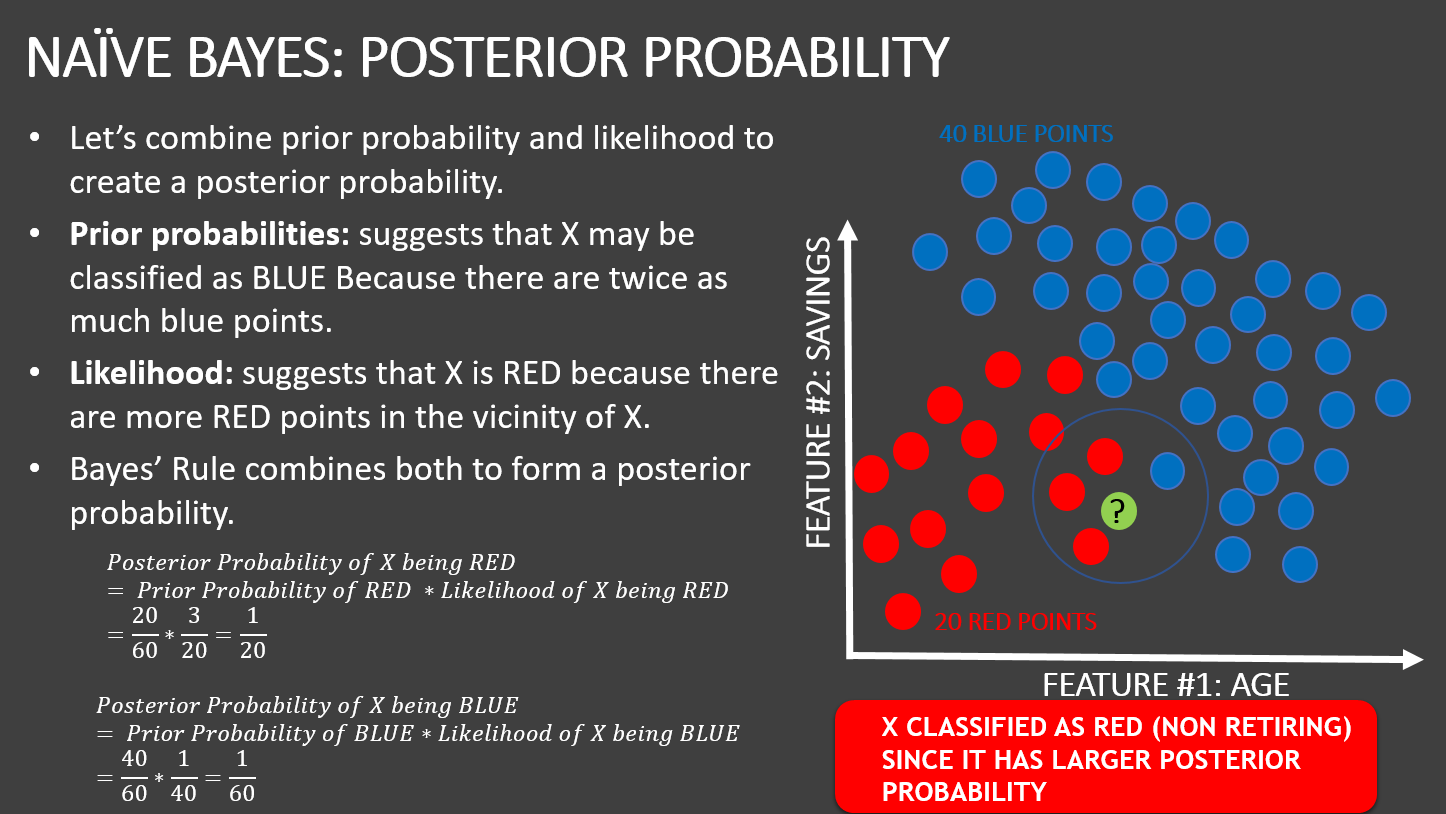

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND NAIVE BAYES CLASSIFIERS - PART #2

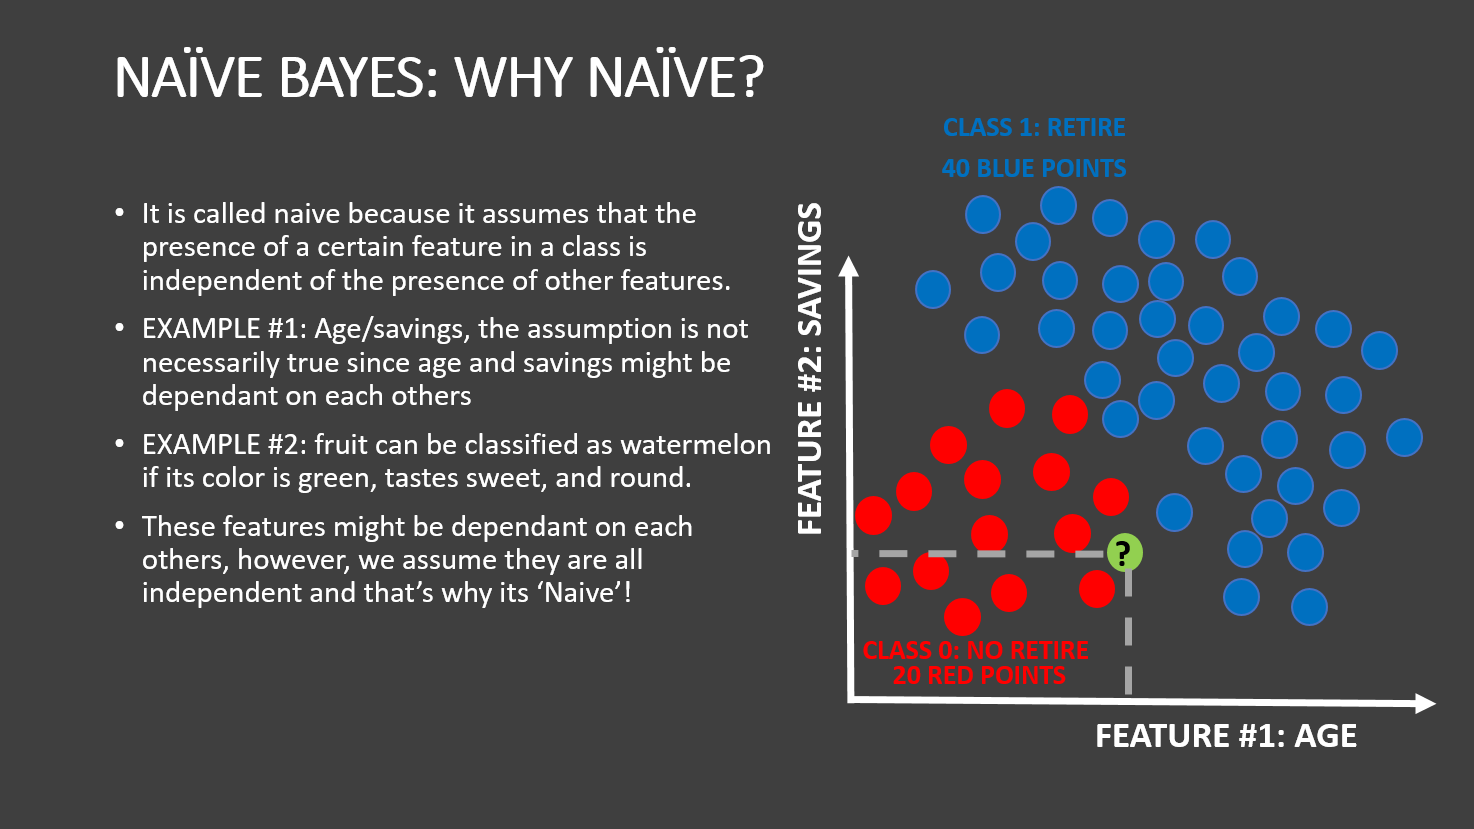

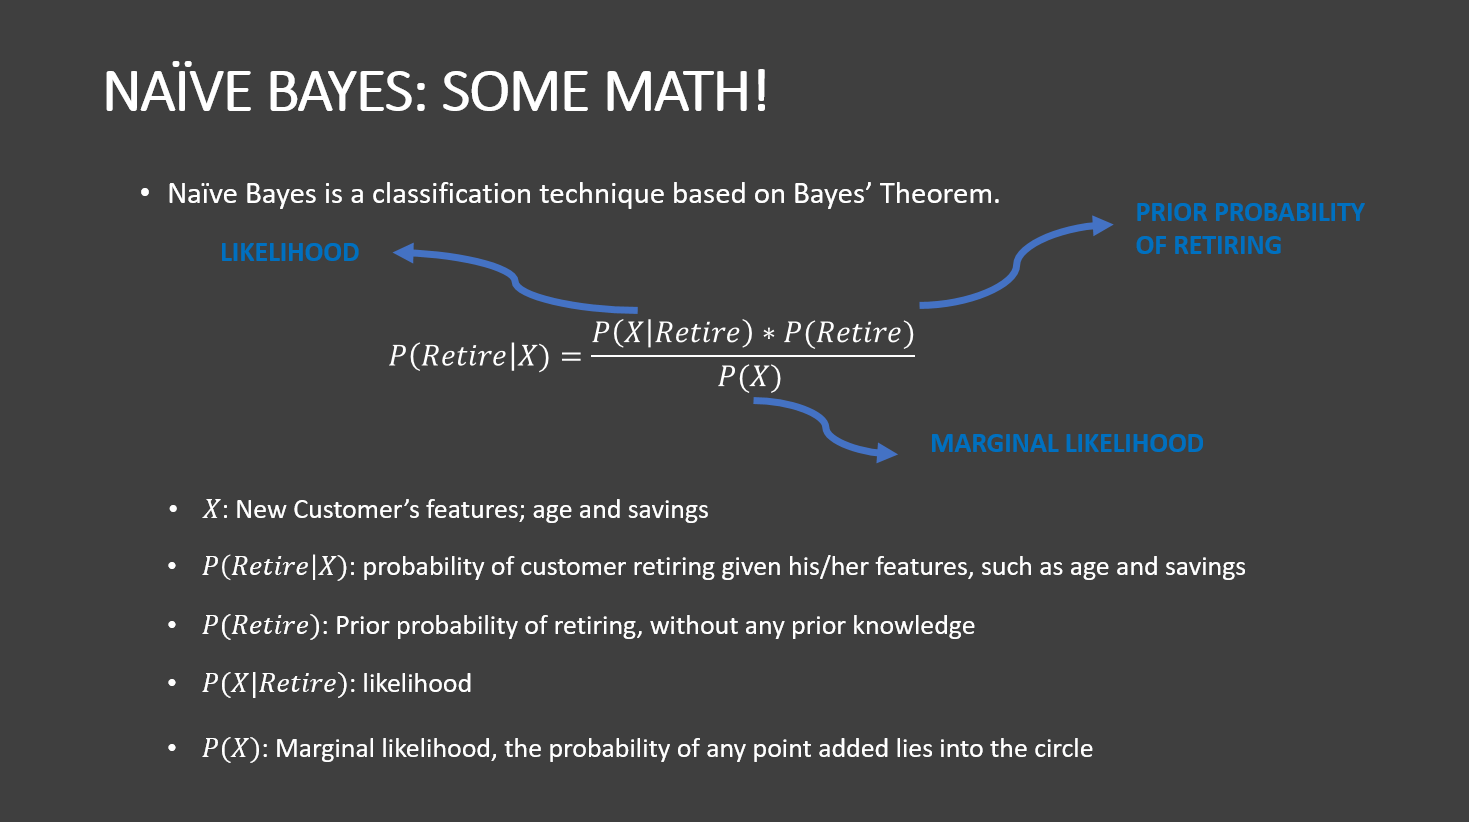

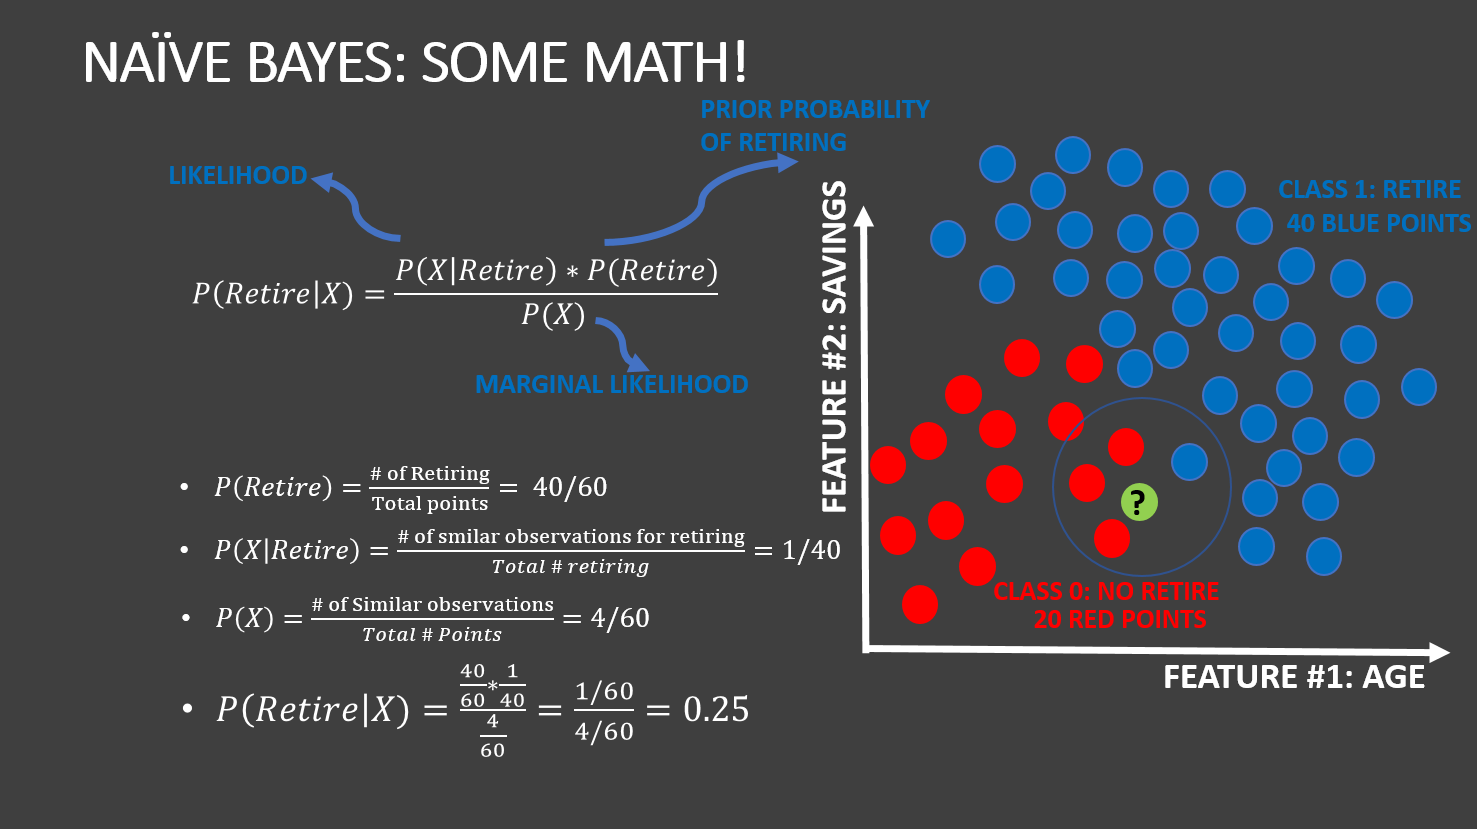

MINI CHALLENGE #4:
- Calculate the probability of the red class (non-retiring).

# TASK#9: TRAIN NAIVE BAYES CLASSIFIER MODEL

In [57]:
countvectorizer

<125x11314 sparse matrix of type '<class 'numpy.int64'>'
	with 35686 stored elements in Compressed Sparse Row format>

In [58]:
X=countvectorizer

In [59]:
y=resume_df['class']

In [61]:
X.shape

(125, 11314)

In [62]:
y.shape

(125,)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [67]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the classifier
NB_classifier = MultinomialNB()

# Train the model
NB_classifier.fit(X_train, y_train)


MultinomialNB()

# TASK #10: ASSESS TRAINED MODEL PERFORMANCE


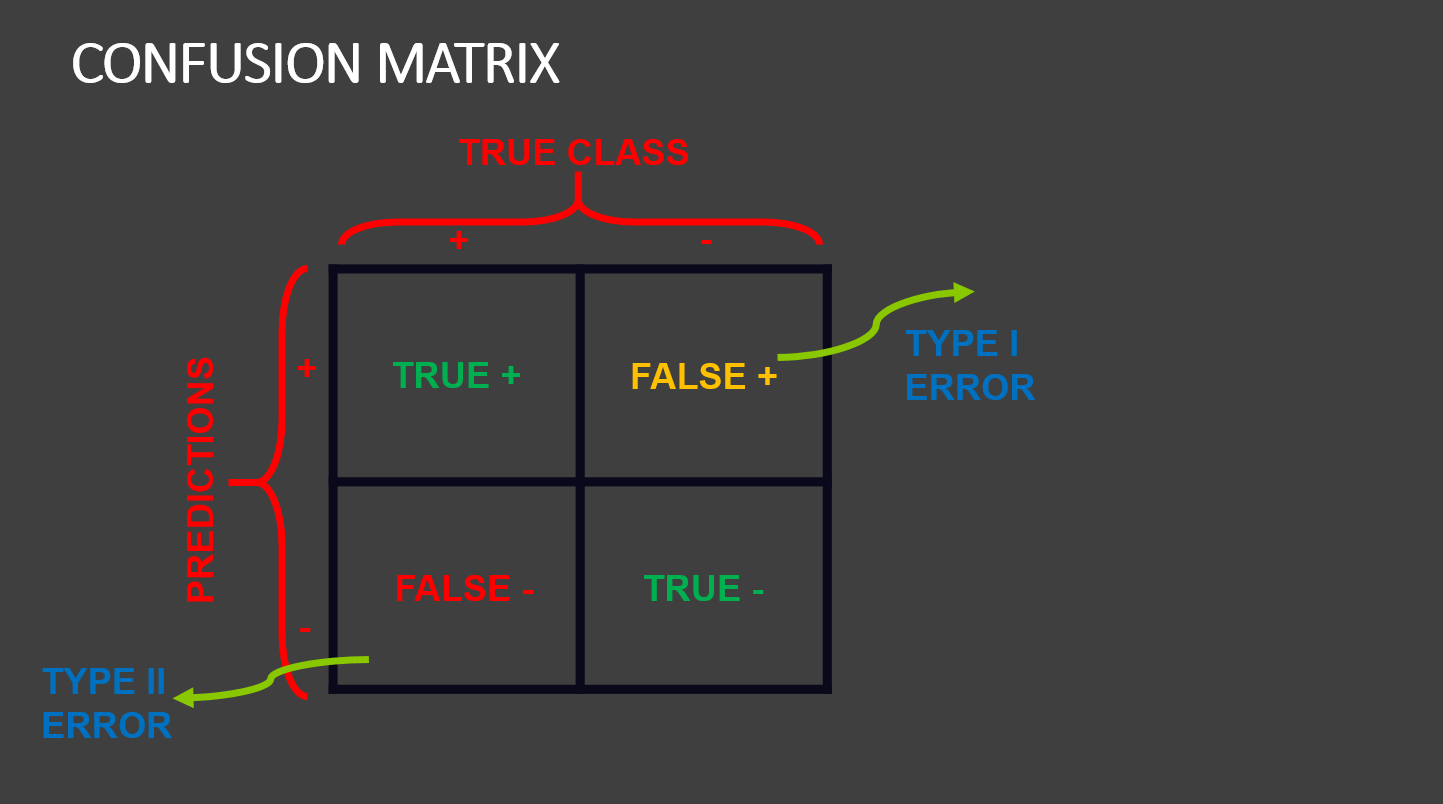

<AxesSubplot: >

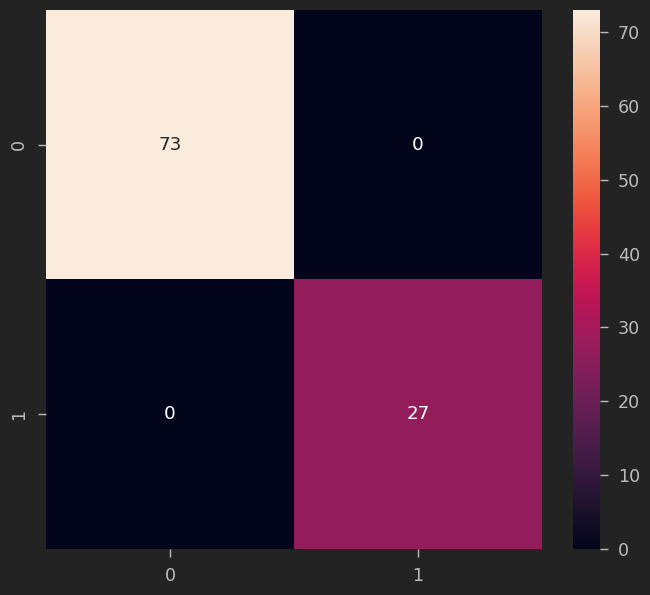

In [68]:
# Predicting the performance on train data
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<AxesSubplot: >

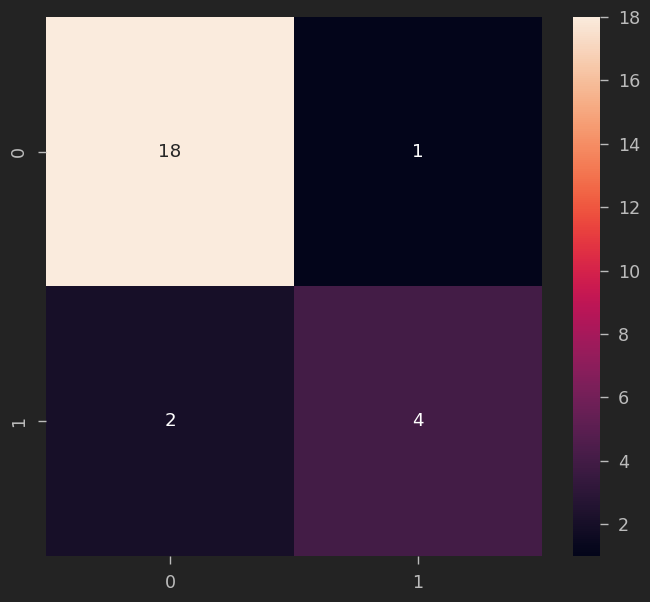

In [69]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [70]:
# classification report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.80      0.67      0.73         6

    accuracy                           0.88        25
   macro avg       0.85      0.81      0.83        25
weighted avg       0.88      0.88      0.88        25



MINI CHALLENGE #6:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


# GREAT JOB!

# MINI CHALLENGES SOLUTIONS

MINI CHALLENGE #1 SOLUTION: 
- Print the first and last elements in the dataframe. 

In [67]:
resume_df.head()

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...


In [68]:
resume_df.tail()

,resume_text,class,cleaned
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...
124,Research and Development Scientist - Burlingto...,0,research development scientist burlington cda ...


MINI CHALLENGE #2 SOLUTION:
- Divide the DataFrame into two, one that belongs to class 0 and 1. Do we have a balanced dataset?

In [69]:
class_0_df = resume_df[resume_df['class']==0]
class_0_df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
5,Poultney VT - Email me on Indeed: indeed.com/r...,0,poultney cbf fba organized independent worker ...
...,...,...,...
119,ProfessionalNewbury VT - Email me on Indeed: i...,0,faeb work college hanover june technologist pe...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...


In [70]:
class_1_df = resume_df[resume_df['class']==1]
class_1_df

,resume_text,class,cleaned
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
7,StatisticianBurlington VT - Email me on Indeed...,1,secure position allow growth development work ...
10,Barbara KurthResearch Assistant Professor Clin...,1,barbara kurthresearch assistant professor clin...
15,Caroline Clauson Work Study StudentBrattleboro...,1,caroline clauson work study caroline clauson c...
17,Chelsea MartinEnvironmental Scientist - Vanass...,1,chelsea scientist vanasse hangen brustlin vhb ...
18,Christopher Fusting Data Science ConsultantBur...,1,christopher fusting data science christopher f...
23,David GrassCity Research Scientist - Environme...,1,david grasscity research scientist environment...
24,David Lucero Public Health AnalystBurlington V...,1,david lucero public health david lucero work r...
27,Drew BurkhardEnvironmental Scientist Meets Mec...,1,drew scientist meets mechanical drew burkhard ...
31,Eric Anderson Data ScientistBrattleboro VT - E...,1,eric anderson data eric anderson adfe looking ...


MINI CHALLENGE #3 SOLUTION:
- Plot the wordcloud for class #1 

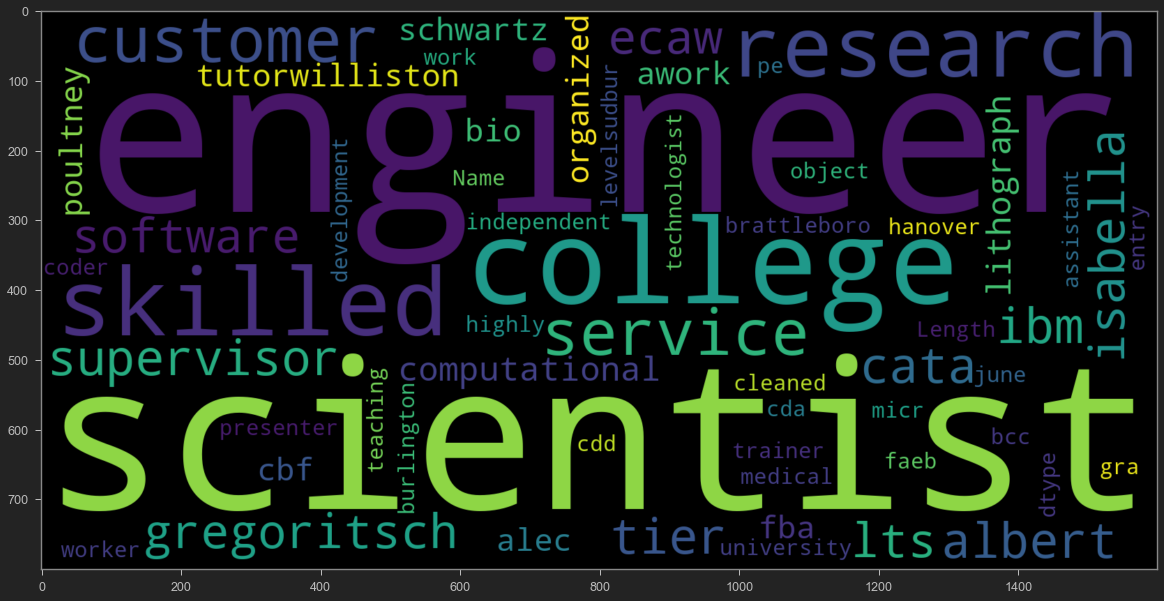

In [71]:
# plot the word cloud for text that is not flagged
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(str(resume_df[resume_df['class'] == 0].cleaned))
plt.imshow(wc , interpolation = 'bilinear')

MINI CHALLENGE #4 SOLUTION:
- Calculate the probability of the red class (non-retiring).

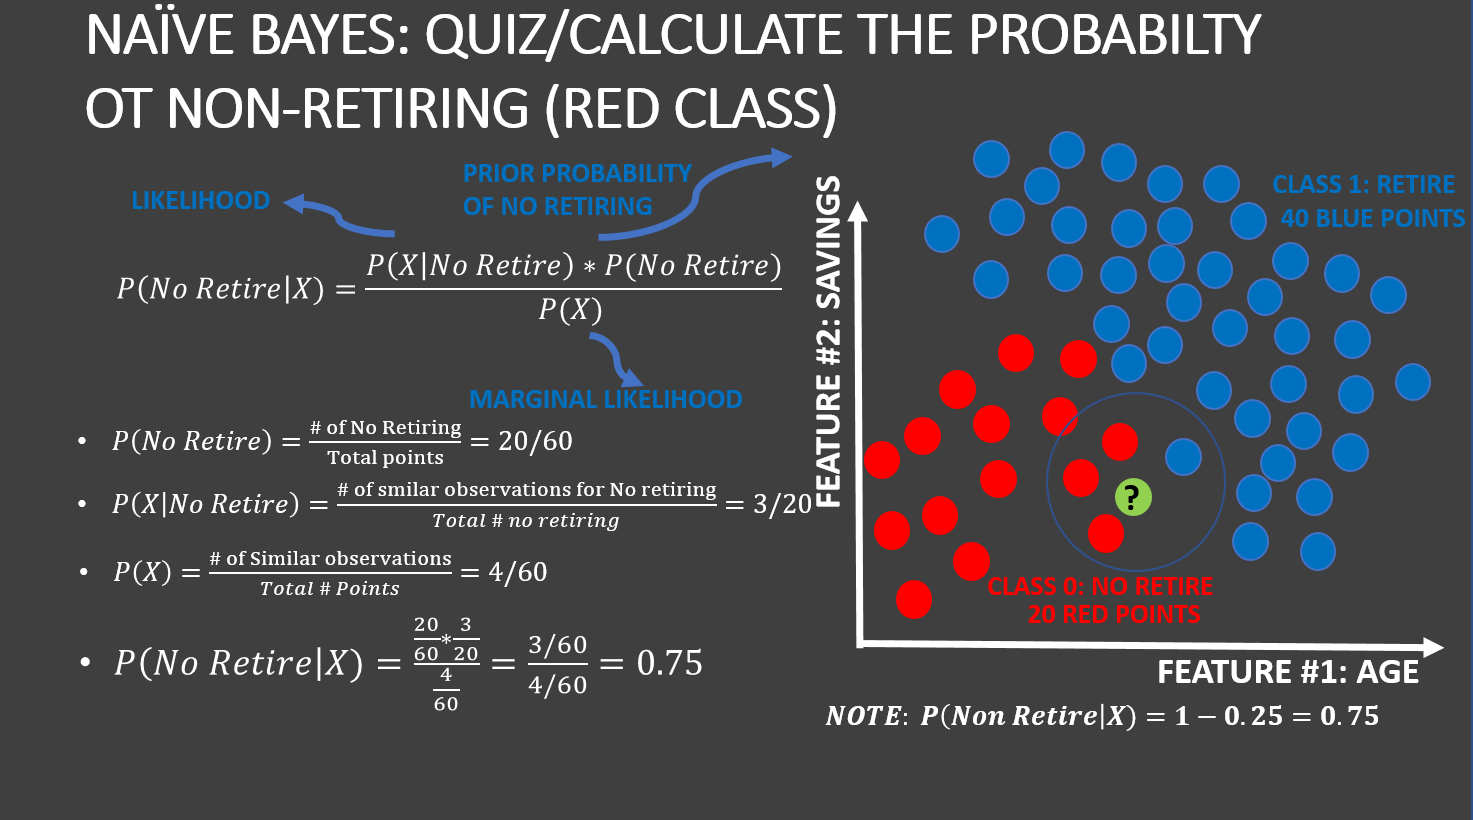

MINI CHALLENGE #5 SOLUTION:
- Split the data into 25% testing and 75% training and perform a sanity check


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

MINI CHALLENGE #6 SOLUTION:
- Retrain the model after spliting the data into 30% testing and 70% training and assess model performance


              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.83      0.56      0.67         9

    accuracy                           0.87        38
   macro avg       0.85      0.76      0.79        38
weighted avg       0.87      0.87      0.86        38



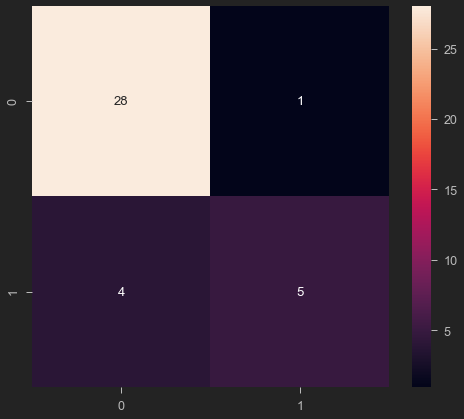

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

# classification report
print(classification_report(y_test, y_predict_test))